<a href="https://colab.research.google.com/github/AlaaElnakeeb81536/Image-Processing-using-OpenCV-and-Py/blob/main/image_processing_(part_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge detection

![detection.PNG](attachment:detection.PNG)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)

    plt.show()

C:\Users\magic\AppData\Local\Temp/ipykernel_23844/4114996960.py:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  coins=color.rgb2gray(coins)


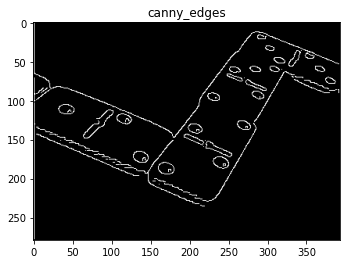

In [ ]:
from skimage.feature import canny
from skimage import color
coins=plt.imread('D:\photos\edge.PNG')
#convert image to grayscale
coins=color.rgb2gray(coins)

#aplly canny detector
canny_edges=canny(coins)

#show resulted image with edges
show_image(canny_edges,'canny_edges')

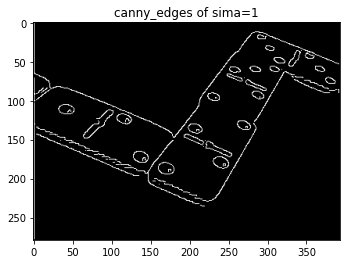

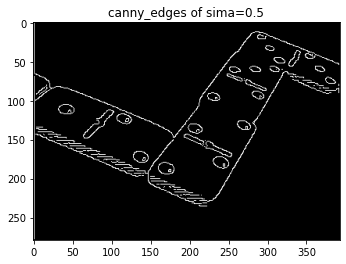

In [ ]:
#apply canny detector with sigma
canny_edges=canny(coins)
canny_edges2=canny(coins,sigma=0.5)

show_image(canny_edges,'canny_edges of sima=1')
show_image(canny_edges2,'canny_edges of sima=0.5')

# Corner detection

![corner.PNG](attachment:corner.PNG)

# Harris Cornrer Detector

C:\Users\magic\AppData\Local\Temp/ipykernel_23844/3904844017.py:6: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image=color.rgb2gray(image)


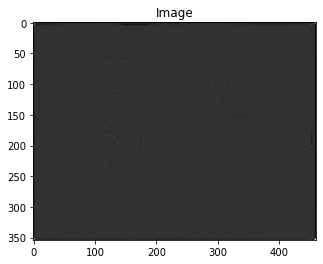

In [ ]:
from skimage.feature import corner_harris

image=plt.imread('D:\photos\de.PNG')

#conveert image to grayscale
image=color.rgb2gray(image)

#apply the harris corner detector on image
measure_image=corner_harris(image)

show_image(measure_image)

In [ ]:
import cv2
def detect_corners(image, min_distance):
    corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, min_distance)
    corners = np.int0(corners)
    return corners

In [ ]:
def show_image_with_corners(image ,coords,title='corner detected'):
    plt.imshow(image,interploation='nearest',cmap='gray')
    plt.title(title)
    plt.plot(coords[:,1],coords[:,0],'+r',marksize=15)


# Detecting images with scikit-image

In [ ]:
#import the classifier class
from skimage.feature import cascade

#load the trained file from module root
trained_file=data.lbp_frontal_face_cascade_filename()

#initialize the detector cascade
detector=Cascade(trained_file)

ImportError: cannot import name 'cascade' from 'skimage.feature' (C:\Users\magic\anaconda3\lib\site-packages\skimage\feature\__init__.py)

In [ ]:
detected=detector.detect_multi_scale(img=image,
                                    scale_factor=1.2,
                                    step_ratio=1,
                                    min_size=(10,10),
                                    max_size=(200,200))

# Privacy protection

![world.PNG](attachment:world.PNG)

In [ ]:
def getFace(d):
    #Extract the face rectangle from the image using cooordinated of the detected
    x,y=d['r'],d['c'] #x and y starting points of the face rectangle
    #the width and height of the face rectangle
    width,height=d['r']+d['width'],d['c']+d['height']
    #extract the detected face
    face=image[x:width,y:height]
    return face

In [ ]:
def mergeBlurryFace(original,gaussian_face):
    #Extract the face rectangle from the image using cooordinated of the detected
    x,y=d['r'],d['c'] #x and y starting points of the face rectangle
    #the width and height of the face rectangle
    width,height=d['r']+d['width'],d['c']+d['height']
    #extract the detected face
    original[x:width,y:height]=gaussian_face
    return original

In [ ]:
from skimage.feature import cascade
from skimage.feature import gaussian

image=plt.imread('D:\photos\world.PNG')

detector=Cascade(trained_file)

#detect the faces
detected=detector.detect_multi_scale(img=image,
                                    scale_factor=1.2,
                                    step_ratio=1,
                                    min_size=(10,10),
                                    max_size=(200,200))


#for each detected face
for d in detected:
    face=getFace(d)

#apply gaussian filter to extracted face
gaussian_face=gaussian(face,multichannel=True,sigma=10)

#merge this blurry face to our final image and show it
resulting_image=mergeBlurryFace(image,gaussian_face)

![after.PNG](attachment:after.PNG)